<a href="https://colab.research.google.com/github/akiabe/udemy_PyTorch_DNN/blob/master/pytorch_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [29]:
# load dataset
N = 20
X = np.random.random(N)*10 - 5
Y = 0.5*X - 1 + np.random.randn(N) 
print("X :")
print(X)
print("Y :")
print(Y)

X :
[-1.55905813 -3.80460243  2.27742338 -2.85256653  3.1509538   4.81502307
  3.5830929  -0.49097262 -3.67113557  2.08117748 -2.88072713  1.86693656
 -1.12061674  4.79391371  0.04662177 -3.66274834  4.69119835  4.93736674
  0.7497694   1.38429961]
Y :
[-2.72924076 -2.75040512  0.34169375 -2.29046821  0.52794033  1.60045401
  2.50194343 -0.29108645 -2.62271249 -2.54497446 -1.39522078 -1.46977593
 -0.39941321  2.26056514 -0.13696891 -2.71514792  2.14692846  0.7186549
 -0.70724636  0.00302199]


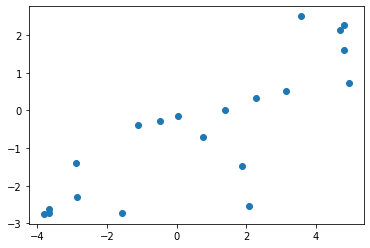

In [30]:
plt.scatter(X, Y);

In [31]:
model = nn.Linear(1, 1)

In [32]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [33]:
X = X.reshape(N, 1)
Y = Y.reshape(N, 1)
print(type(X))
print(type(Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [34]:
inputs = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))
print(type(inputs))
print(type(targets))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [35]:
n_epoch = 30
losses = []
for it in range(n_epoch):
  optimizer.zero_grad()

  outputs = model(inputs)
  loss = criterion(outputs, targets)

  losses.append(loss.item())

  loss.backward()
  optimizer.step()

  print(f"Epoch {it+1}/{n_epoch}, Loss: {loss.item():.4f}")

Epoch 1/30, Loss: 16.3245
Epoch 2/30, Loss: 14.3077
Epoch 3/30, Loss: 12.5844
Epoch 4/30, Loss: 11.1026
Epoch 5/30, Loss: 9.8220
Epoch 6/30, Loss: 8.7111
Epoch 7/30, Loss: 7.7445
Epoch 8/30, Loss: 6.9015
Epoch 9/30, Loss: 6.1651
Epoch 10/30, Loss: 5.5210
Epoch 11/30, Loss: 4.9569
Epoch 12/30, Loss: 4.4626
Epoch 13/30, Loss: 4.0293
Epoch 14/30, Loss: 3.6492
Epoch 15/30, Loss: 3.3157
Epoch 16/30, Loss: 3.0229
Epoch 17/30, Loss: 2.7660
Epoch 18/30, Loss: 2.5404
Epoch 19/30, Loss: 2.3424
Epoch 20/30, Loss: 2.1685
Epoch 21/30, Loss: 2.0158
Epoch 22/30, Loss: 1.8817
Epoch 23/30, Loss: 1.7639
Epoch 24/30, Loss: 1.6605
Epoch 25/30, Loss: 1.5697
Epoch 26/30, Loss: 1.4899
Epoch 27/30, Loss: 1.4198
Epoch 28/30, Loss: 1.3583
Epoch 29/30, Loss: 1.3043
Epoch 30/30, Loss: 1.2568


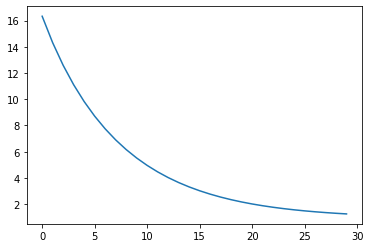

In [36]:
plt.plot(losses);

In [39]:
model(inputs).numpy()

RuntimeError: ignored

In [40]:
preds = model(inputs).detach().numpy()
print(type(preds))

<class 'numpy.ndarray'>


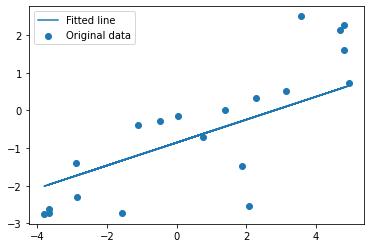

In [41]:
plt.scatter(X, Y, label="Original data")
plt.plot(X, preds, label="Fitted line")
plt.legend()
plt.show()

In [42]:
# y = ax + b
a = model.weight.data.numpy()
b = model.bias.data.numpy()
print(a, b)

[[0.3047072]] [-0.85484827]
